In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [15]:
df = pd.read_csv("BTC-USD.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

data = df[['Close']].values

In [16]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [17]:
def create_sequences(data, window=60):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)

X = X.reshape(X.shape[0], X.shape[1], 1)

In [18]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [19]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
10/10 [==============================] - 9s 95ms/step - loss: 0.1374
Epoch 2/10
10/10 [==============================] - 1s 84ms/step - loss: 0.0241
Epoch 3/10
10/10 [==============================] - 2s 165ms/step - loss: 0.0170
Epoch 4/10
10/10 [==============================] - 2s 251ms/step - loss: 0.0136
Epoch 5/10
10/10 [==============================] - 2s 173ms/step - loss: 0.0127
Epoch 6/10
10/10 [==============================] - 1s 78ms/step - loss: 0.0109
Epoch 7/10
10/10 [==============================] - 1s 76ms/step - loss: 0.0106
Epoch 8/10
10/10 [==============================] - 1s 75ms/step - loss: 0.0097
Epoch 9/10
10/10 [==============================] - 1s 88ms/step - loss: 0.0094
Epoch 10/10
10/10 [==============================] - 1s 65ms/step - loss: 0.0085


In [20]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

actual = scaler.inverse_transform(y_test.reshape(-1, 1))


3/3 [==============================] - 2s 21ms/step


In [21]:
prediction_dates = df.index[-len(actual):]

In [22]:
lstm_forecast_df = pd.DataFrame({
    "date": prediction_dates,
    "actual_price": actual.flatten(),
    "lstm_predicted_price": predictions.flatten()
})

lstm_forecast_df.to_csv("lstm_btc_forecast.csv", index=False)

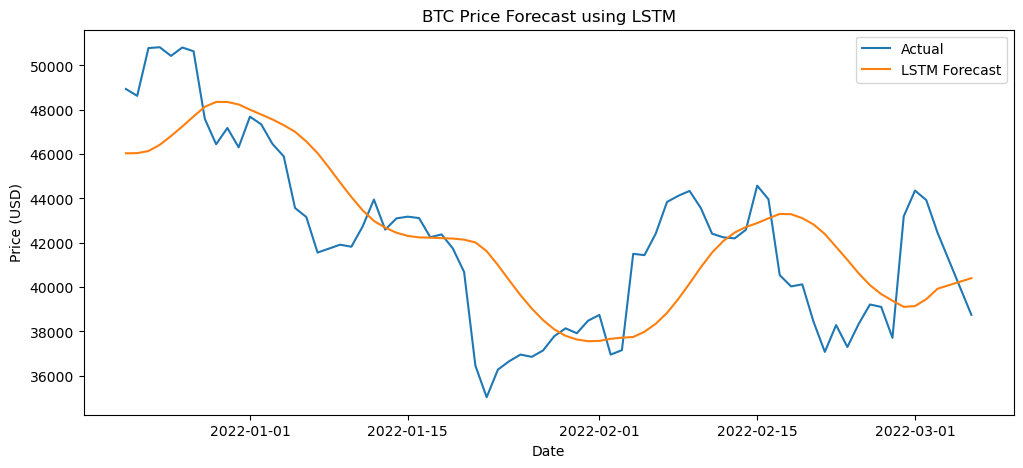

In [23]:
plt.figure(figsize=(12,5))
plt.plot(prediction_dates, actual, label="Actual")
plt.plot(prediction_dates, predictions, label="LSTM Forecast")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("BTC Price Forecast using LSTM")
plt.legend()
plt.show()